# Updated Grocery Stores Notebook

This is an updated version for the grocery notebook I created for the midterm. A lot of unnecessary codes are deleted, a function is added, and things need to be worked on are noted.

**Import libraries.**

In [76]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px

**Import file.**

In [77]:
gs = gpd.read_file('GroceryStores.geojson')

**Look at the basic information of the dataset, then trim down the columns with the ones needed.**

In [78]:
#look at general info of the dataset
gs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Store_Name          1377 non-null   object  
 1   Store_Chain         1377 non-null   object  
 2   Street_Number       1377 non-null   object  
 3   Street_Name         1377 non-null   object  
 4   Additional Address  1377 non-null   object  
 5   City                1377 non-null   object  
 6   Zip_Code            1377 non-null   object  
 7   Latitude            1377 non-null   object  
 8   Longitude           1377 non-null   object  
 9   geometry            1377 non-null   geometry
dtypes: geometry(1), object(9)
memory usage: 107.7+ KB


In [75]:
#choose the desired colums
desired_columns = ['Store_Name','Store_Chain','Street_Number','Street_Name', 'Additional Address','City','Zip_Code','Latitude','Longitude']
gs[desired_columns].sample(5)

,Store_Name,Store_Chain,Street_Number,Street_Name,Additional Address,City,Zip_Code,Latitude,Longitude
1260,VONS 1673,Vons,8201,Topanga Canyon Blvd,,Canoga Park,91304,34.21761,-118.6061
1047,Target Store T-2275,Target,1621,S Alameda St,,Compton,90220,33.8806,-118.2181
226,El Super 502,El_Super,1035,S la Brea Ave,,Inglewood,90301,33.9503,-118.3528
233,El Super 15,El_Super,3321,W Century Blvd,Ste A,Inglewood,90303,33.9455,-118.3294
287,FOOD 4 LESS 332,Food_4_Less,8035,Webb Ave,,North Hollywood,91605,34.21711,-118.3891


In [79]:
#create a variable with only the desired columns
gs_trimmed = gs[desired_columns].copy()
gs_trimmed

,Store_Name,Store_Chain,Street_Number,Street_Name,Additional Address,City,Zip_Code,Latitude,Longitude
0,99 Ranch Market 38,99 Ranch Market,345,E Main St,,Alhambra,91801,34.09719,-118.1227
1,99 RANCH MARKET 17,99 Ranch Market,17713,Pioneer Blvd,,Artesia,90701,33.87005,-118.0824
2,99 Ranch Market 18,99 Ranch Market,1625,S Azusa Ave,,Hacienda Heights,91745,33.99284,-117.9318
3,99 RANCH MARKET 7,99 Ranch Market,1300,S Golden West Ave,,Arcadia,91007,34.12338,-118.0597
4,99 Ranch Market 3,99 Ranch Market,1015,S Nogales St,,Rowland Heights,91748,33.99646,-117.8884
...,...,...,...,...,...,...,...,...,...
1372,Whole Foods Market 10177,Whole_Foods,6350,W 3rd St,,Los Angeles,90036,34.07133,-118.3603
1373,Whole Foods Market 10536,Whole_Foods,12746,W Jefferson Blvd,,Playa Vista,90094,33.97406,-118.4257
1374,Whole Foods Market 10545,Whole_Foods,3401,W Olive Ave,,Burbank,91505,34.15423,-118.3369
1375,Whole Foods Market 10383,Whole_Foods,500,Wilshire Blvd,,Santa Monica,90401,34.01985,-118.4973


**Create a static map plotted with all the grocery chain stores in LA County.**

In [80]:
#convert data to geod dataframe
gdf = gpd.GeoDataFrame(gs_trimmed, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(gs_trimmed.Longitude, gs_trimmed.Latitude))

In [81]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [82]:
#reproject to web mercator
gdf_web_mercator = gdf.to_crs(epsg=3857)

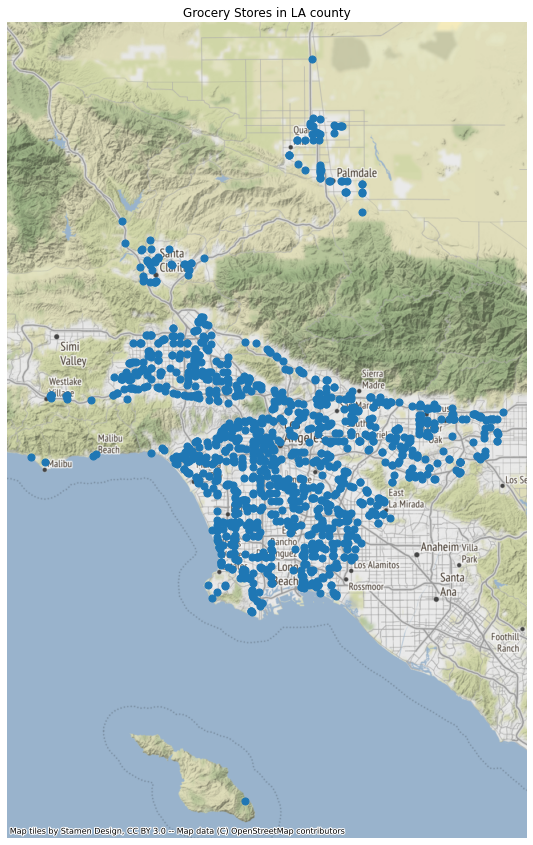

In [83]:
#Plot it
fig, ax = plt.subplots(figsize=(20,15))

gdf_web_mercator.plot(ax=ax, 
                      marker='o',
                      markersize=50
                )

ax.axis('off')

ax.set_title('Grocery Stores in LA county')

ctx.add_basemap(ax)

In [84]:
#Convert the data type of "Latitude" and Longitude" from string to float for mapping.
gs_trimmed['Latitude'] = gs_trimmed['Latitude'].astype(float)
gs_trimmed['Longitude'] = gs_trimmed['Longitude'].astype(float)
gs_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Store_Name          1377 non-null   object  
 1   Store_Chain         1377 non-null   object  
 2   Street_Number       1377 non-null   object  
 3   Street_Name         1377 non-null   object  
 4   Additional Address  1377 non-null   object  
 5   City                1377 non-null   object  
 6   Zip_Code            1377 non-null   object  
 7   Latitude            1377 non-null   float64 
 8   Longitude           1377 non-null   float64 
 9   geometry            1377 non-null   geometry
dtypes: float64(2), geometry(1), object(7)
memory usage: 107.7+ KB


**Create an interactive map with all grocery chain stores in LA County.**

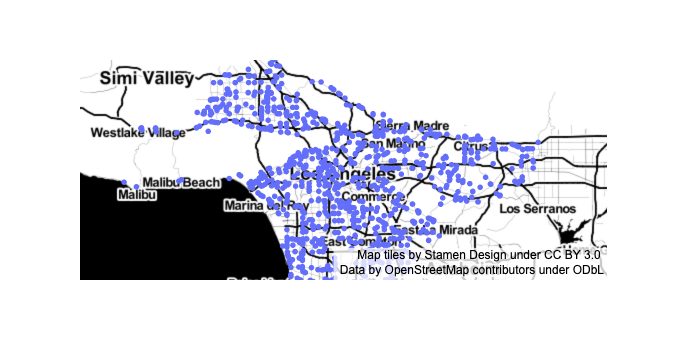

In [85]:
#map it with scatter mapbox
fig = px.scatter_mapbox(gs_trimmed,
                        lat='Latitude',
                        lon='Longitude',
                        mapbox_style="stamen-toner")
fig.show()

**Create a function for mapping only the desired chains (i.e. Trader Joe's, Numero Uno).**

In [86]:
#create a function
def Store_Chain (Store_Chain='Trader_joes'):
    
    fig = px.scatter_mapbox(
                            gs_trimmed[gs_trimmed.Store_Chain==Store_Chain], 
                            lat="Latitude", 
                            lon="Longitude", 
                            color="Store_Chain",
                            labels={'Store_Chain':'Store_Chain'}
                           )

    fig.update_layout(mapbox_style="carto-darkmatter")

    fig.show()

In [68]:
gs_trimmed.Store_Chain.unique().tolist()

['99 Ranch Market',
 'Albertsons',
 'Aldi',
 'Amazon',
 'Best_way_supermarket',
 'Big_k_mart',
 'Big_saver_food',
 'Buy_low',
 'Carniceria_Vallarta',
 'Costco_Wholesale',
 'El_Super',
 'Food_4_Less',
 'Fresh&Easy',
 'Galleria',
 'Gelsons',
 'Gigante',
 'Grocery_Outlet',
 'H_mart',
 'Haggen',
 'Hong_kong_supermarket',
 'Hows',
 'Island_Pacific',
 'Jons',
 'Kmart',
 'Mother_Nutrition',
 'Northgate',
 'Numero_uno',
 'Payless_food',
 'R_ranch',
 'Ralphs',
 'Sams_club',
 'Sav_on_drug',
 'Seafood_city',
 'Smart&final',
 'Sprouts',
 'Stater_bros',
 'Super_A_food',
 'Super_king',
 'Superior_grocers',
 'Target',
 'Top_valu',
 'Trader_joes',
 'Vallarta',
 'Valu_plus',
 'Vons',
 'Walmart',
 'Whole_Foods']

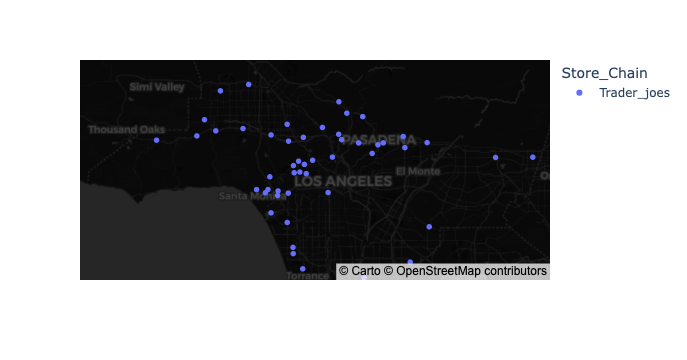

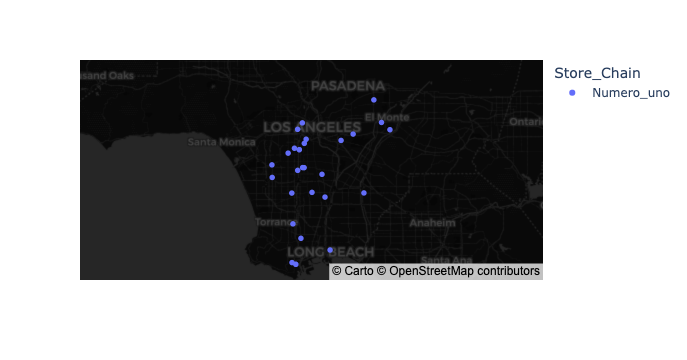

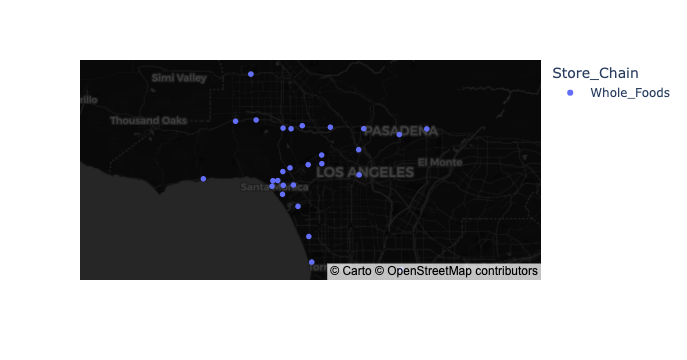

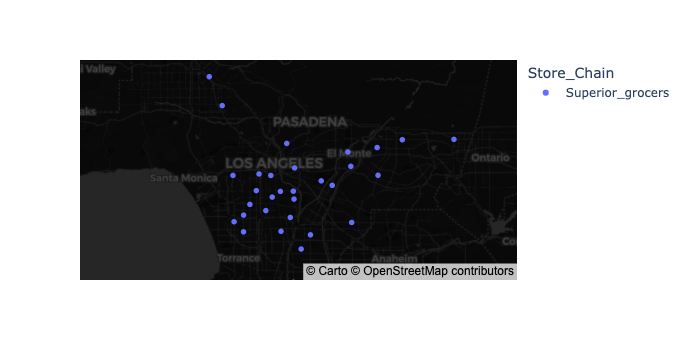

In [88]:
#choose the desired store chains and map them
Store_Chain(Store_Chain='Trader_joes')
Store_Chain(Store_Chain='Numero_uno')
Store_Chain(Store_Chain='Whole_Foods')
Store_Chain(Store_Chain='Superior_grocers')

**Create an interactive map with different color-coded chains all show on one map.**

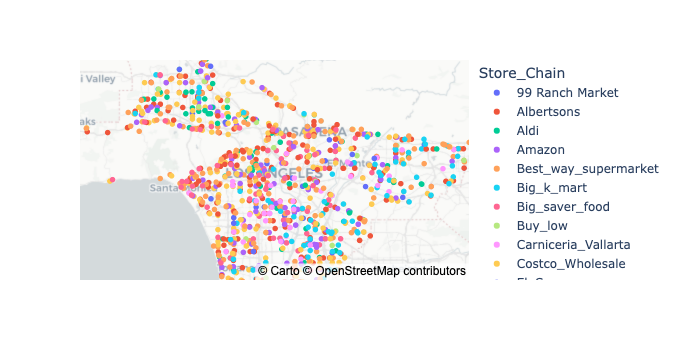

In [89]:
#map all the chains on one map
fig = px.scatter_mapbox(gs_trimmed, 
                        lat="Latitude", 
                        lon="Longitude", 
                        color="Store_Chain",
                        labels={'Store_chain':'Store_chain'}
                       )

fig.update_layout(mapbox_style="carto-positron")

fig.show()

**Better visualization**. Comparing using a function to create individual map for each chain, I found this way of mapping for better visualization of the different preference of chains' locations of their stores, by only selecting the chains I want to explore. For example, from merely selecting Trader Joe's and Numero Uno, one can clearly tell that the preference of their choice of locations for opening their stores are different. Trader Joe's tend to open near coastal region, while Numero Uno tend to open in central and south LA. Corresponding with our income and race census maps, we can draw the correlation which Trader Joe's tend to open in more affluent white concentrated neighborhood whereas Numero Uno opens in relatively low income neighborhoods.

**Problem** with this map is that there are only 10 color codes, but I have 20 store chains. Something will be worked on is to find a way to add more color codes, and also overlay it with census race and income map.

**Plotting using Kepler**

Color problem is solved using Kepler by changing the color based on "Store_Chain" and choose "step" for 20 , but I still need to work on overlaying it with race and income map.

In [90]:
#import Kepler
from keplergl import KeplerGl

In [91]:
#map it
map = KeplerGl(height=600,width=800)
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=600)

In [92]:
#add the stores date
map.add_data(data=gs,name='Store_Chain')

In [93]:
#save it
map.save_to_html(file_name='grocerystores.html',read_only=True)

Map saved to grocerystores.html!


# Author: Jinglan Lin

**note:** the interactive maps are not shown in github. 